<a href="https://colab.research.google.com/github/RailyaR/project_3/blob/main/tariff_for_a_telecom_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком-компании
Описание проекта

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание данных**

**Таблица users (информация о пользователях):**

*user_id — уникальный идентификатор пользователя

*first_name — имя пользователя

*last_name — фамилия пользователя

*age — возраст пользователя (годы)

*reg_date — дата подключения тарифа (день, месяц, год)

*churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

*city — город проживания пользователя

*tariff — название тарифного плана

   **Таблица calls (информация о звонках):**
   
id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

  **Таблица messages (информация о сообщениях):**
  
id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

   **Таблица internet (информация об интернет-сессиях):**
   
id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import seaborn as sns

In [13]:
users = pd.read_csv('/content/users.csv')
calls = pd.read_csv('/content/calls.csv')
messages = pd.read_csv('/content/messages.csv')
internet = pd.read_csv('/content/internet.csv')
tariffs = pd.read_csv('/content/tariffs.csv')

In [14]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div class="alert alert-info">
<b>👆 О таблице  users : </b> 
<br> * Первостепенно в глаза бросается NAN в столбце churn_date, но в описание данных написано о том , что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому в столбце ничего не меняем.
<br>  * Далее reg_date	нужно поменять тип столбца object на data-time. И добавить в таблицу колонку месяц и день.
<br> * Дубликатов в данной таблице нет
    
</div>

In [15]:
calls.info()
calls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [16]:
print("Число строк в calls:", calls.shape[0])
print("Число уникальных пользователей:", calls['user_id'].count())
print("Число дубликатов:", calls.duplicated().sum())

Число строк в calls: 202607
Число уникальных пользователей: 202607
Число дубликатов: 0


In [17]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

<div class="alert alert-info">
<b>👆 О таблице  calls : </b> 
<br> * Дубликатов нет. 
<br> * Далее call_date нужно поменять тип столбца object на datatime. И добавить в таблицу колонку месяц и день. 
<br> *  Для удобства duration Можно перевести в int и округлить в большую сторону.A также было выявленно, что были звонки которые длились 0 секунд.Мне кажется это не состоявшиеся звонки, поэтому их можно удалить. 
    
</div>

In [18]:
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [19]:
print("Число строк в messages:",messages.shape[0])
print("Число уникальных пользователей:", messages['user_id'].count())
print("Число дубликатов:", messages.duplicated().sum())

Число строк в messages: 123036
Число уникальных пользователей: 123036
Число дубликатов: 0


<div class="alert alert-info">
<b>👆 О таблице  messages: </b> 
<br> * Дубликатов нет. 
<br> * Далее messages_date нужно поменять тип столбца object на datatime. И добавить в таблицу колонку месяц и день. 
<br> *Пропусков нет 
    
</div>

In [20]:
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [21]:
internet =  pd.read_csv('/content/internet.csv',index_col=0) 
internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

In [22]:

internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<div class="alert alert-info">
<b>👆 О таблице  internet: </b> 
<br> * Дубликатов нет. 
<br> * Далее session_date нужно поменять тип столбца object на datatime. И добавить в таблицу колонку месяц и день. 
<br> *Пропусков нет 
<br> * Нужно удалить в internet['mb_used'] показали 0 и округлить до большего значения. Также поменять на int 
        
</div>

In [23]:
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-info">
<b>👆 О таблице  tariffs: </b> 
<br> * В данной таблице все отлично
        
</div>

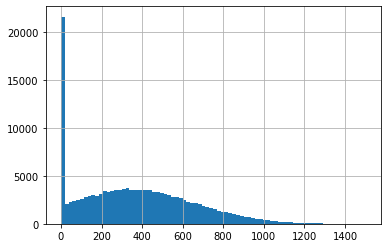

In [24]:
internet['mb_used'].hist(bins = 80,range=(0, 1500))

<div class="alert alert-info">
<b>👆 О таблице internet['mb_used'] </b> 
<br> *Действительно, есть присутствие аномалий в данной таблице. На нуле происходит большой скачек, видимо очень много сессий не состоялось 
        
</div>

# Шаг 2. Подготовьте данные

## Приведите данные к нужным типам;
## Найдите и исправьте ошибки в данных, если они есть.

In [25]:
# столбец в формат datetime + добавление столбцов "месяц" и "день"
def dt_month_weekday(dframes):
    for df in dframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].dt.month
                df['day'] = df[column].dt.day

In [26]:
dt_month_weekday([users, calls, messages, internet])

In [27]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,day
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,25
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,1
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,17
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,17
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,14


In [28]:
calls

,id,call_date,duration,user_id,month,day
0,1000_0,2018-07-25,0.00,1000,7,25
1,1000_1,2018-08-17,0.00,1000,8,17
2,1000_2,2018-06-11,2.85,1000,6,11
3,1000_3,2018-09-21,13.80,1000,9,21
4,1000_4,2018-12-15,5.18,1000,12,15
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,26
202603,1499_216,2018-10-18,18.83,1499,10,18
202604,1499_217,2018-11-10,10.81,1499,11,10
202605,1499_218,2018-10-06,4.27,1499,10,6


In [29]:
messages

,id,message_date,user_id,month,day
0,1000_0,2018-06-27,1000,6,27
1,1000_1,2018-10-08,1000,10,8
2,1000_2,2018-08-04,1000,8,4
3,1000_3,2018-06-16,1000,6,16
4,1000_4,2018-12-05,1000,12,5
...,...,...,...,...,...
123031,1499_179,2018-12-12,1499,12,12
123032,1499_180,2018-09-28,1499,9,28
123033,1499_181,2018-09-27,1499,9,27
123034,1499_182,2018-11-15,1499,11,15


In [30]:
internet

,id,mb_used,session_date,user_id,month,day
0,1000_0,112.95,2018-11-25,1000,11,25
1,1000_1,1052.81,2018-09-07,1000,9,7
2,1000_2,1197.26,2018-06-25,1000,6,25
3,1000_3,550.27,2018-08-22,1000,8,22
4,1000_4,302.56,2018-09-24,1000,9,24
...,...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10,3
149392,1499_153,490.13,2018-12-14,1499,12,14
149393,1499_154,0.00,2018-10-27,1499,10,27
149394,1499_155,1246.32,2018-11-26,1499,11,26


In [31]:
calls['duration_round'] =   np.ceil(calls['duration'])

In [32]:
calls['duration_round'].value_counts()

0.0     39613
7.0     11510
6.0     11457
5.0     11411
8.0     11272
9.0     10973
4.0     10918
3.0     10362
10.0    10186
11.0     9385
2.0      9194
12.0     8448
1.0      8402
13.0     7486
14.0     6554
15.0     5505
16.0     4551
17.0     3671
18.0     2984
19.0     2411
20.0     1806
21.0     1304
22.0      975
23.0      720
24.0      468
25.0      363
26.0      257
27.0      151
28.0      104
29.0       56
30.0       39
31.0       30
32.0       17
33.0       10
35.0        5
34.0        3
37.0        2
36.0        2
38.0        2
Name: duration_round, dtype: int64

In [33]:
calls

,id,call_date,duration,user_id,month,day,duration_round
0,1000_0,2018-07-25,0.00,1000,7,25,0.0
1,1000_1,2018-08-17,0.00,1000,8,17,0.0
2,1000_2,2018-06-11,2.85,1000,6,11,3.0
3,1000_3,2018-09-21,13.80,1000,9,21,14.0
4,1000_4,2018-12-15,5.18,1000,12,15,6.0
...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,26,1.0
202603,1499_216,2018-10-18,18.83,1499,10,18,19.0
202604,1499_217,2018-11-10,10.81,1499,11,10,11.0
202605,1499_218,2018-10-06,4.27,1499,10,6,5.0


# #Посчитайте для каждого пользователя:
### количество сделанных звонков и израсходованных минут разговора по месяцам;
### количество отправленных сообщений по месяцам;
### объем израсходованного интернет-трафика по месяцам;
### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества   звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [34]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
calls_duration_date =  calls.pivot_table(index = ['user_id', 'month'], values = ['duration_round','id'], aggfunc = {'id':'count','duration_round': 'sum'})

#calls_duration_date.columns = [ 'clls','duration_round']
calls_duration_date.sort_values('duration_round', ascending = False)

duration_round   id
user_id month                     
1467    12             1673.0  244
1377    3              1609.0  203
1216    12             1435.0  198
1196    6              1410.0  176
1377    10             1401.0  178
...                       ...  ...
1257    8                 0.0    2
        9                 0.0    1
        7                 0.0    1
1240    2                 0.0    2
1373    1                 0.0    2

[3174 rows x 2 columns]

<div class="alert alert-info">
<b>👆 О таблице </b> 
<br> * Как видно по таблице больше всего потрачено секунд в декабре (12 месяц) 1467 пользователем 
        
</div>

In [35]:
#количество отправленных сообщений по месяцам
messages_id_date =  messages.pivot_table(index = ['user_id', 'month'], values = ['id'], aggfunc = {'id':'count'})
messages_id_date.columns = ['messages']
messages_id_date.sort_values('messages', ascending = False)

messages
user_id month          
1165    12          224
1028    10          223
1231    7           211
        6           201
1165    11          197
...                 ...
1109    10            1
1408    7             1
1389    8             1
1458    3             1
1394    1             1

[2717 rows x 1 columns]

<div class="alert alert-info">
<b>👆 О таблице </b> 
<br> * Как видно по таблице больше всего отправлено сообщений в декабре, а именно 224 , 1165 пользователем
        
</div>

In [36]:
#объем израсходованного интернет-трафика по месяцам
internet_id_date =  internet.pivot_table(index = ['user_id', 'month'], values = ['mb_used'], aggfunc = {'mb_used':'sum'})
internet_id_date.columns = ['mb_used_round']
internet_id_date.sort_values('mb_used_round', ascending = False)

,,mb_used_round
user_id,month,
1124,10,49745.69
1240,8,48351.59
1255,7,45180.71
1300,11,44296.86
1060,12,43931.36
...,...,...
1105,9,370.06
1201,12,365.09
1482,2,201.07


In [37]:
internet_id_date['mb_used_round'] =  np.ceil(internet_id_date['mb_used_round'] / 1024)

In [38]:
internet_id_date.sort_values('mb_used_round', ascending = False)

,,mb_used_round
user_id,month,
1124,10,49.0
1240,8,48.0
1255,7,45.0
1300,11,44.0
1060,12,43.0
...,...,...
1476,4,1.0
1240,2,1.0
1050,10,1.0


In [39]:
abonents = pd.merge(calls_duration_date, messages_id_date, how='outer', on=['user_id', 'month']) # , on=['user_id', 'month']   inner
abonents = pd.merge(abonents, internet_id_date, how='outer', on=['user_id', 'month']) # , on=['user_id', 'month']
abonents

duration_round    id  messages  mb_used_round
user_id month                                               
1000    5               159.0  22.0      22.0            3.0
        6               172.0  43.0      60.0           23.0
        7               340.0  47.0      75.0           14.0
        8               408.0  52.0      81.0           14.0
        9               466.0  58.0      57.0           15.0
...                       ...   ...       ...            ...
1489    9                 NaN   NaN      32.0           17.0
        10                NaN   NaN      21.0           20.0
        11                NaN   NaN      20.0           18.0
        12                NaN   NaN      35.0           17.0
1476    4                 NaN   NaN       NaN            1.0

[3214 rows x 4 columns]

<div class="alert alert-info">
<b>👆 О таблице </b> 
<br> * Вот и вышли nan, мне кажется лучше их заменить на ноль
</div>

In [40]:
# пропущенные значения заменяем на нули
abonents.loc[abonents['duration_round'].isna(), 'duration_round'] = 0
abonents.loc[abonents['messages'].isna(), 'messages'] = 0
abonents.loc[abonents['mb_used_round'].isna(), 'mb_used_round'] = 0
abonents.loc[abonents['id'].isna(), 'id'] = 0
abonents

duration_round    id  messages  mb_used_round
user_id month                                               
1000    5               159.0  22.0      22.0            3.0
        6               172.0  43.0      60.0           23.0
        7               340.0  47.0      75.0           14.0
        8               408.0  52.0      81.0           14.0
        9               466.0  58.0      57.0           15.0
...                       ...   ...       ...            ...
1489    9                 0.0   0.0      32.0           17.0
        10                0.0   0.0      21.0           20.0
        11                0.0   0.0      20.0           18.0
        12                0.0   0.0      35.0           17.0
1476    4                 0.0   0.0       0.0            1.0

[3214 rows x 4 columns]

In [41]:
abonents=abonents.reset_index()

#### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества   звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

In [42]:
# добавим наименование используемого тарифа для каждого пользователя
user_tarif_city = users.loc[:,['user_id', 'city', 'tariff']]
user_tarif_city

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [43]:
df = pd.merge( abonents,user_tarif_city, how= 'right', on=['user_id'])
df

,user_id,month,duration_round,id,messages,mb_used_round,city,tariff
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,340.0,47.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,408.0,52.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,466.0,58.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1498,10.0,247.0,41.0,42.0,21.0,Владикавказ,smart
3212,1499,9.0,70.0,9.0,11.0,2.0,Пермь,smart
3213,1499,10.0,449.0,68.0,48.0,18.0,Пермь,smart
3214,1499,11.0,612.0,74.0,59.0,18.0,Пермь,smart


In [44]:
df['user_id'].value_counts()

1189    12
1032    12
1453    12
1433    12
1429    12
        ..
1406     1
1095     1
1258     1
1170     1
1129     1
Name: user_id, Length: 500, dtype: int64

In [45]:
def revenue_sum(row):
    tariff = row['tariff']
    duration_round = row['duration_round']
    messages = row['messages']
    internet = row['mb_used_round']
    revenue_ultra = 1950
    revenue_smart = 550
    calls_ultra = 3000
    mes_ultra = 1000
    inter_ultra = 30
    cost_min_ultra = 1
    cost_mes_ultra = 1
    cost_inter_ultra = 150
    calls_smart = 500
    mes_smart = 50
    inter_smart = 15
    cost_min_smart = 3
    cost_mes_smart = 3
    cost_inter_smart = 200
    revenue = 0 
    
    if tariff =='ultra':
        if duration_round >calls_ultra:
             revenue += cost_min_ultra*(duration_round-calls_ultra) 
        if messages > mes_ultra:
            revenue += cost_mes_ultra*(messages-mes_ultra)
        if internet > inter_ultra:
            revenue +=cost_inter_ultra*(internet-inter_ultra)
        return revenue + revenue_ultra
    if tariff == 'smart':
        if duration_round >calls_smart:
            revenue += cost_min_smart*(duration_round-calls_smart)
        if messages > mes_smart:
            revenue += cost_mes_smart*(messages-mes_smart)
        if internet > inter_smart:
            revenue += cost_inter_smart*(internet-inter_smart)
        return revenue_smart  + revenue 
df['revenue']= df.apply(revenue_sum, axis = 1)
        
        
            

In [46]:
df

,user_id,month,duration_round,id,messages,mb_used_round,city,tariff,revenue
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra,1950.0
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra,1950.0
2,1000,7.0,340.0,47.0,75.0,14.0,Краснодар,ultra,1950.0
3,1000,8.0,408.0,52.0,81.0,14.0,Краснодар,ultra,1950.0
4,1000,9.0,466.0,58.0,57.0,15.0,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3211,1498,10.0,247.0,41.0,42.0,21.0,Владикавказ,smart,1750.0
3212,1499,9.0,70.0,9.0,11.0,2.0,Пермь,smart,550.0
3213,1499,10.0,449.0,68.0,48.0,18.0,Пермь,smart,1150.0
3214,1499,11.0,612.0,74.0,59.0,18.0,Пермь,smart,1513.0


In [47]:
df.sort_values('revenue')

,user_id,month,duration_round,id,messages,mb_used_round,city,tariff,revenue
1820,1287,9.0,94.0,18.0,0.0,7.0,Севастополь,smart,550.0
2611,1407,10.0,397.0,55.0,38.0,15.0,Челябинск,smart,550.0
2612,1407,11.0,239.0,38.0,28.0,12.0,Челябинск,smart,550.0
1168,1181,11.0,109.0,16.0,16.0,6.0,Омск,smart,550.0
407,1064,9.0,479.0,64.0,33.0,14.0,Якутск,smart,550.0
...,...,...,...,...,...,...,...,...,...
1819,1286,12.0,739.0,95.0,68.0,35.0,Москва,smart,5321.0
1648,1261,12.0,1074.0,141.0,22.0,32.0,Казань,smart,5672.0
3142,1486,11.0,764.0,108.0,96.0,36.0,Нижний Новгород,smart,5680.0
260,1042,12.0,728.0,121.0,75.0,37.0,Хабаровск,smart,5709.0


In [48]:
# check
df['revenue'].sum()

4916951.0

In [49]:
# check
df[df['user_id'] == 1499]

,user_id,month,duration_round,id,messages,mb_used_round,city,tariff,revenue
3212,1499,9.0,70.0,9.0,11.0,2.0,Пермь,smart,550.0
3213,1499,10.0,449.0,68.0,48.0,18.0,Пермь,smart,1150.0
3214,1499,11.0,612.0,74.0,59.0,18.0,Пермь,smart,1513.0
3215,1499,12.0,492.0,69.0,66.0,13.0,Пермь,smart,598.0


## Шаг 3. Проанализируйте данные
### Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [50]:
medians = df.pivot_table(index=['user_id','month','tariff', 'city'], values=['duration_round', 'messages', 'mb_used_round', 'revenue'], aggfunc='median')


medians
#Зависимость цены от расстояния от центра

duration_round  mb_used_round  messages  \
user_id month tariff city                                                   
1000    5.0   ultra  Краснодар             159.0            3.0      22.0   
        6.0   ultra  Краснодар             172.0           23.0      60.0   
        7.0   ultra  Краснодар             340.0           14.0      75.0   
        8.0   ultra  Краснодар             408.0           14.0      81.0   
        9.0   ultra  Краснодар             466.0           15.0      57.0   
...                                          ...            ...       ...   
1498    10.0  smart  Владикавказ           247.0           21.0      42.0   
1499    9.0   smart  Пермь                  70.0            2.0      11.0   
        10.0  smart  Пермь                 449.0           18.0      48.0   
        11.0  smart  Пермь                 612.0           18.0      59.0   
        12.0  smart  Пермь                 492.0           13.0      66.0   

                                  revenue  
user_id month tariff city                  
1000    5.0   ultra  Краснодар     1950.0  
        6.0   ultra  Краснодар     1950.0  
        7.0   ultra  Краснодар     1950.0  
        8.0   ultra  Краснодар     1950.0  
        9.0   ultra  Краснодар     1950.0  
...                                   ...  
1498    10.0  smart  Владикавказ   1750.0  
1499    9.0   smart  Пермь          550.0  
        10.0  smart  Пермь         1150.0  
        11.0  smart  Пермь         1513.0  
        12.0  smart  Пермь          598.0  

[3214 rows x 4 columns]

##### Посчитаем среднее количество, дисперсию и стандартное отклонение

In [51]:

desc_stat =df.pivot_table(index=['tariff'], values=['duration_round', 'mb_used_round', 'messages'], 
                    aggfunc={'duration_round': [np.median, np.var, np.std], 
                             'mb_used_round': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std]})
desc_stat.dropna().style.format(" {:,.1f}")

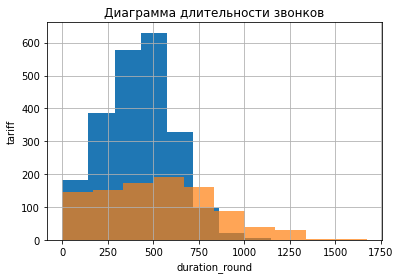

In [52]:


smart_duration_round = df.query("tariff == 'smart'")
ultra_duration_round = df.query("tariff == 'ultra'")



smart_duration_round['duration_round'].plot(kind='hist', alpha=1, grid=True)
ultra_duration_round['duration_round'].plot(kind='hist', alpha=0.7, grid=True)
plt.xlabel('duration_round')
plt.ylabel('tariff')
plt.title('Диаграмма длительности звонков')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


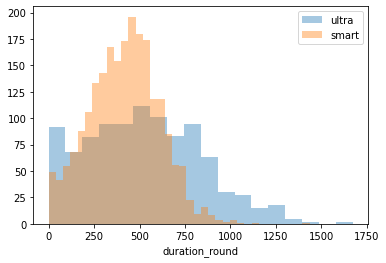

In [53]:
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['duration_round'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


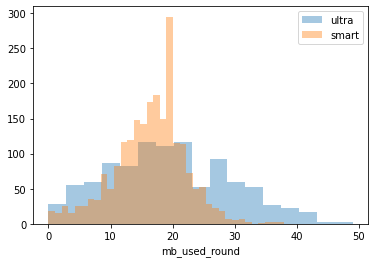

In [54]:
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['mb_used_round'], kde=False)
_ = plt.legend(['ultra', 'smart'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


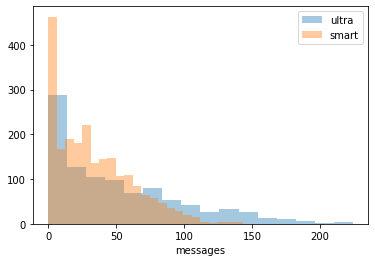

In [55]:
for tariff in ['ultra', 'smart']:
    sns.distplot(medians.query('tariff == @tariff')['messages'], kde=False)
_ = plt.legend(['ultra', 'smart'])

<div class="alert alert-info">
<b>👆 Коментаий </b> 
<br> 

По гистограмма можно сделать ввывод о использовании тарифа пользователями. Поведение пользователей тарифа "Ультра" более рассширенное. Пользователи дорогого тарифа довольно таки широко используют объемы тарифного плана: возможно, использование дорогого тарифа помогает им не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора.
</div>

### Шаг 4. Проверьте гипотезы


 H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

H1  — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

α=0.05%

In [56]:
ultra = df.query('tariff == "ultra"')['revenue']
smart = df.query('tariff == "smart"')['revenue']

alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


In [57]:
df.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,1021.0
ultra,1950.0


<div class="alert alert-info">
<b>👆 Коментаий </b> 
<br> 

Нулевую гипотезу действительно опровергаем. Потому что это видно по средним значениям прибыли. По смарту выходит больше прибыли, хотя тарифный план его не большой. Но и предоставляемые услуги не велики. Поэтому пользователю тарифного плана " Смарт" прихиходится переплачивать.Тем самым увеличивая прибыль Мегалайна.
</div>


H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1  — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

α=0.05%

In [58]:
moscow = df.query('city == "Москва"')['revenue']
regions = df.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


In [59]:
def region(city):
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'город'
    
df['region'] =df['city'].apply(region)
df.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Москва,1750.0
город,1583.0


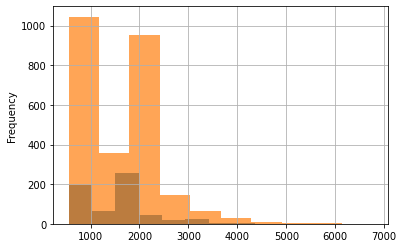

In [60]:

moscow = df.query('city == "Москва"')['revenue']
regions = df.query('city != "Москва"')['revenue']



moscow .plot(kind='hist', alpha=1, grid=True)
regions.plot(kind='hist', alpha=0.7, grid=True)

plt.show()

In [61]:
revenue = df.copy()

In [62]:
revenue.columns

Index(['user_id', 'month', 'duration_round', 'id', 'messages', 'mb_used_round',
       'city', 'tariff', 'revenue', 'region'],
      dtype='object')

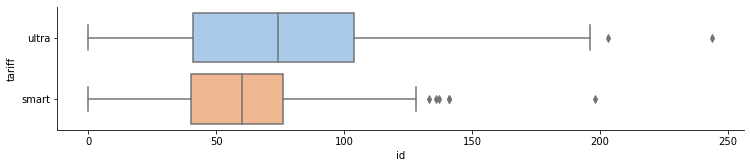

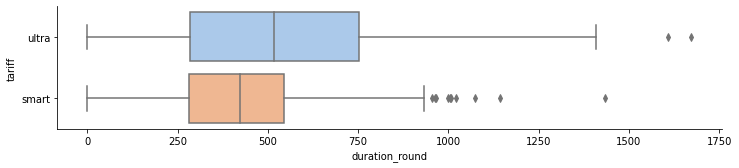

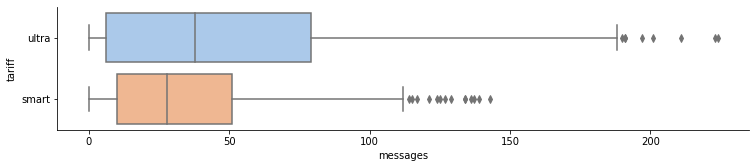

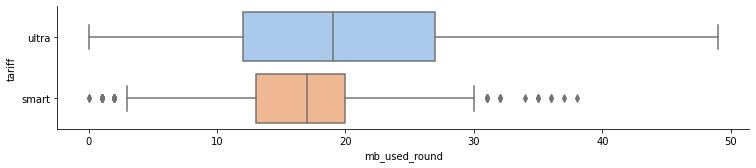

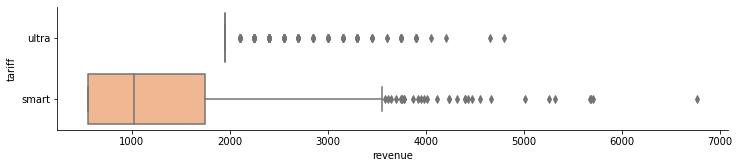

In [63]:

for column in ['id', 'duration_round', 'messages',
       'mb_used_round', 'revenue']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data= revenue, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)
#     g.set(xlim=(-50, None))

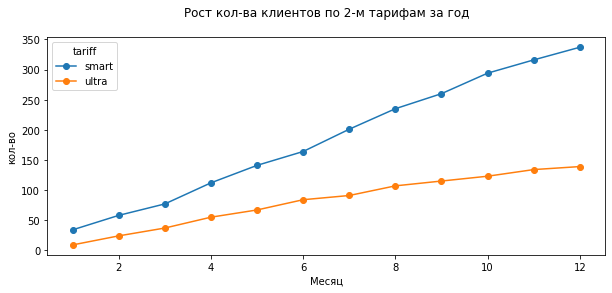

In [64]:
(revenue
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

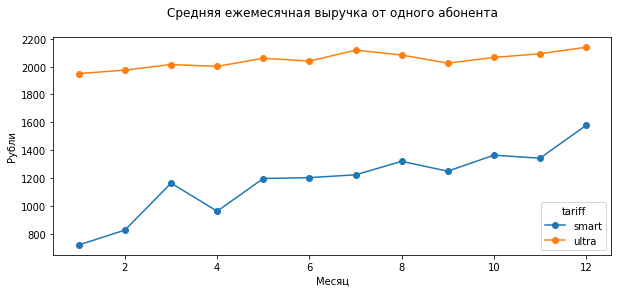

In [65]:
(revenue
 .pivot_table(index='tariff', columns='month', values='revenue', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

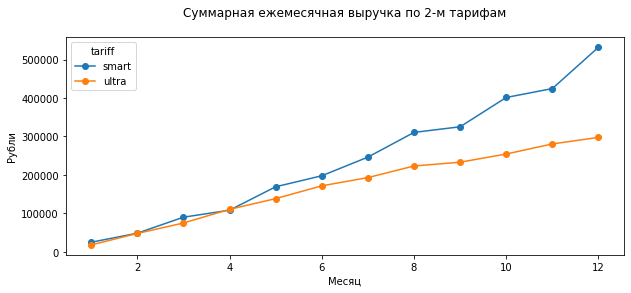

In [66]:
(revenue
 .pivot_table(index='tariff', columns='month', values='revenue', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

### выручка от смартов уже в два раза выше выручки от ультры, но есть опасность - убегут клиенты смарт от такой счастливой жизни к конкурентам :)

In [67]:
try:
    df_users = pd.read_csv('/datasets/users.csv')
except:
    df_users = pd.read_csv('users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


отток усиливается

<div class="alert alert-info">
<b>👆Итоговый вывод  </b> 
<br> 

    По результатам статистического анализа доходы от тарифа «Смарт» больше, чем от тарифа «Ультра»: в среднем «Мегалайн» от одного пользователя в месяц получает 950 рублей и 1950 рублей.
    По данным статистического анализа можно сделать вывод . что на тарифе "Смарт" Мегалай получает больше дохада, так как тарифный план для пользователей является недостаточным.
    Также, если рассматривать Москву и отдельные регионы, у  " Мегалайн" выручка незначительно выше именно в Москве.
    Итог таков, что "Мегалайну" надо подумать и выработать промежуточное решение, которое позволяло бы клиенту более комфортно, без доп. заказов, пользоваться услугами связи (особенно мобильным интернетом), при этом по цене являлось бы промежуточным вариантом между текущими Смарт и Ультра. Учитывая то, что средний пользователь тарифа Смарт дозаказывает 2 Гб на 400 рублей, т.е. платит в итоге 550 + 400 = 950 рублей за месяц



</div>